In [1]:
import coeficients
import cmeans_math.data_loads as data_loads
import cmeans_math.data_preprocessing as dp

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('./data/irises/IRIS.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
X = np.array(data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

In [5]:
X = np.array(dp.get_updated_data_set(X))
X

array([[-5.55555556e-01,  2.50000000e-01, -8.64406780e-01,
        -9.16666667e-01],
       [-6.66666667e-01, -1.66666667e-01, -8.64406780e-01,
        -9.16666667e-01],
       [-7.77777778e-01,  0.00000000e+00, -8.98305085e-01,
        -9.16666667e-01],
       [-8.33333333e-01, -8.33333333e-02, -8.30508475e-01,
        -9.16666667e-01],
       [-6.11111111e-01,  3.33333333e-01, -8.64406780e-01,
        -9.16666667e-01],
       [-3.88888889e-01,  5.83333333e-01, -7.62711864e-01,
        -7.50000000e-01],
       [-8.33333333e-01,  1.66666667e-01, -8.64406780e-01,
        -8.33333333e-01],
       [-6.11111111e-01,  1.66666667e-01, -8.30508475e-01,
        -9.16666667e-01],
       [-9.44444444e-01, -2.50000000e-01, -8.64406780e-01,
        -9.16666667e-01],
       [-6.66666667e-01, -8.33333333e-02, -8.30508475e-01,
        -1.00000000e+00],
       [-3.88888889e-01,  4.16666667e-01, -8.30508475e-01,
        -9.16666667e-01],
       [-7.22222222e-01,  1.66666667e-01, -7.96610169e-01,
      

In [6]:
fsi = []
pc = []
pec = []
pcaes = []
mah = []
mah_inv = []
klc = []

In [6]:
min_cluster_count = 1
max_cluster_count = 20

In [8]:
for i in range(min_cluster_count, max_cluster_count + 1):
    cmeans_tst = coeficients.FCM_coef(mat_X=X, n_clusters=i, max_iter=300, random_state=1)
    cmeans_tst.fit()
    fsi.append(cmeans_tst.fukuyama_sugeno_index)
    pc.append(cmeans_tst.partition_coefficient)
    pec.append(cmeans_tst.partition_entropy_coefficient)
    pcaes.append(cmeans_tst.partition_coef_exp_sep)
    mah.append(cmeans_tst.mahalanobis_coefficient)
    mah_inv.append(cmeans_tst.mahalanobis_inverse_coefficient)
    klc.append(cmeans_tst.kulback_leibler_coefficient)
    print('Tested clusters:', i)

Tested clusters: 1
Tested clusters: 2
Tested clusters: 3
Tested clusters: 4
Tested clusters: 5
Tested clusters: 6
Tested clusters: 7
Tested clusters: 8
Tested clusters: 9
Tested clusters: 10
Tested clusters: 11
Tested clusters: 12
Tested clusters: 13
Tested clusters: 14
Tested clusters: 15
Tested clusters: 16
Tested clusters: 17
Tested clusters: 18
Tested clusters: 19
Tested clusters: 20


In [11]:
res_coefs = pd.DataFrame()
res_coefs['fsi'] = np.array(fsi)
res_coefs['pc'] = np.array(pc)
res_coefs['pec'] = np.array(pec)
res_coefs['pcaes'] = np.array(pcaes)
res_coefs['mah'] = np.array(mah)
res_coefs['mah_inv'] = np.array(mah_inv)
res_coefs['klc'] = np.array(klc)

In [12]:
res_coefs

,fsi,pc,pec,pcaes,mah,mah_inv,klc
0,164.552689,1.000000,-0.000000,0.000000e+00,1.851289,1.851289,0.000000
1,472.700745,0.859932,0.356800,1.596369e+05,1.788559,2.060525,-98.424782
2,-97.722168,0.742014,0.675367,6.120274e+06,1.789576,2.327380,-84.787392
3,865.501282,0.653494,0.954754,9.981713e+06,1.775776,2.612462,-68.320267
4,-75.459435,0.581921,1.206745,1.121204e+07,1.790750,3.096532,-55.678474
5,-71.043266,0.537353,1.339308,1.054982e+06,1.767166,3.057690,-52.291348
6,-69.100479,0.506806,1.466683,1.451494e+06,1.749685,3.047688,-47.645641
7,-65.387405,0.506256,1.549074,1.075082e+06,1.761976,3.409341,-43.028305
8,-58.868782,0.484213,1.639340,2.210598e+06,1.751076,3.354036,-40.477730
9,-55.217918,0.460427,1.755187,2.218760e+06,1.732619,3.622449,-36.989586


In [14]:
res_coefs.to_csv('./data/results/iris_res.csv')

In [1]:
def plot_res(x, y, x_label, y_label, title):
    plt.plot(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
res_coefs = pd.read_csv('./data/results/iris_res.csv')

In [4]:
res_coefs.head()

,Unnamed: 0,fsi,pc,pec,pcaes,mah,mah_inv,klc
0,0,164.552690,1.000000,-0.000000,0.000000e+00,1.851289,1.851289,0.000000
1,1,472.700740,0.859932,0.356800,1.596369e+05,1.788559,2.060525,-98.424780
2,2,-97.722170,0.742014,0.675367,6.120274e+06,1.789576,2.327380,-84.787390
3,3,865.501300,0.653494,0.954754,9.981713e+06,1.775776,2.612462,-68.320270
4,4,-75.459435,0.581921,1.206745,1.121204e+07,1.790750,3.096532,-55.678474


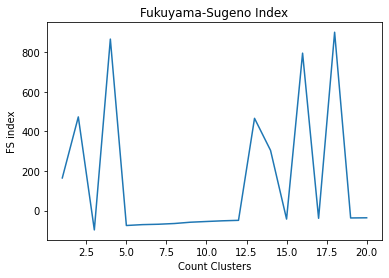

In [7]:
plot_res(x=range(min_cluster_count, max_cluster_count + 1), y=res_coefs['fsi'],
         x_label='Count Clusters', y_label='FS index', title='Fukuyama-Sugeno Index')

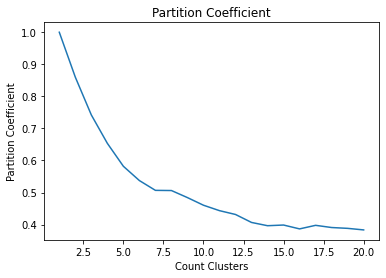

In [8]:
plot_res(x=range(min_cluster_count, max_cluster_count + 1), y=res_coefs['pc'],
         x_label='Count Clusters', y_label='Partition Coefficient', title='Partition Coefficient')

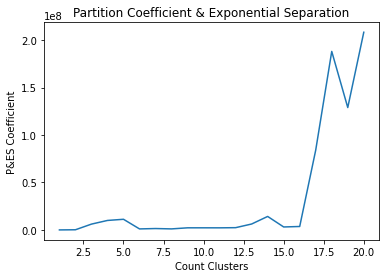

In [10]:
plot_res(x=range(min_cluster_count, max_cluster_count + 1), y=res_coefs['pcaes'],
         x_label='Count Clusters', y_label='P&ES Coefficient', title='Partition Coefficient & Exponential Separation')

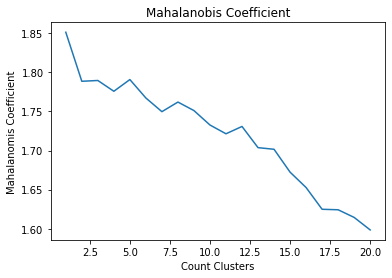

In [11]:
plot_res(x=range(min_cluster_count, max_cluster_count + 1), y=res_coefs['mah'],
         x_label='Count Clusters', y_label='Mahalanomis Coefficient', title='Mahalanobis Coefficient')

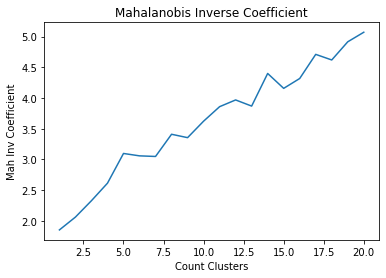

In [12]:
plot_res(x=range(min_cluster_count, max_cluster_count + 1), y=res_coefs['mah_inv'],
         x_label='Count Clusters', y_label='Mah Inv Coefficient', title='Mahalanobis Inverse Coefficient')

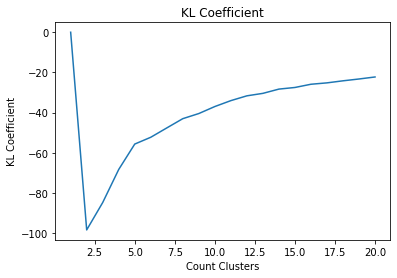

In [13]:
plot_res(x=range(min_cluster_count, max_cluster_count + 1), y=res_coefs['klc'],
         x_label='Count Clusters', y_label='KL Coefficient', title='KL Coefficient')